In [11]:
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [24]:
start=datetime.datetime(2012,1,1)
end=datetime.datetime(2017,1,1)

In [27]:
tesla=web.DataReader('TSLA','yahoo',start,end)
ford=web.DataReader('F','yahoo',start,end)
gm=web.DataReader('GM','yahoo',start,end)

In [8]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [9]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,10.06,9.92,10.04,10.00,31253700.0,7.028978
2010-01-04,10.28,10.05,10.17,10.28,60855800.0,7.225790
2010-01-05,11.24,10.40,10.45,10.96,215620200.0,7.703759
2010-01-06,11.46,11.13,11.21,11.37,200070600.0,7.991947
2010-01-07,11.69,11.32,11.46,11.66,130201700.0,8.195788


In [10]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-18,35.990002,33.889999,35.000000,34.189999,457044300.0,26.155519
2010-11-19,34.500000,33.110001,34.150002,34.259998,107842000.0,26.209070
2010-11-22,34.480000,33.810001,34.200001,34.080002,36650600.0,26.071363
2010-11-23,33.990002,33.189999,33.950001,33.250000,31170200.0,25.436413
2010-11-24,33.799999,33.220001,33.730000,33.480000,26138000.0,25.612371


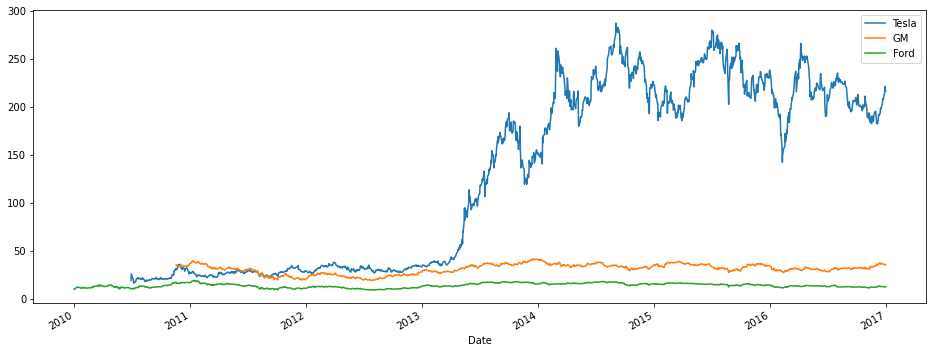

In [12]:
tesla['Open'].plot(label='Tesla',figsize=(16,6))
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

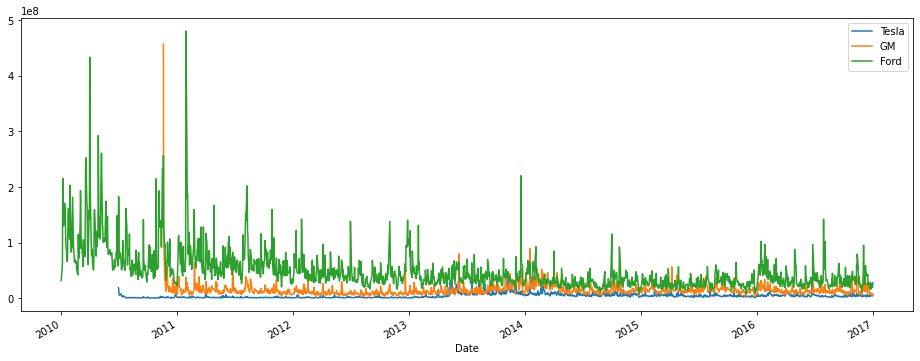

In [13]:
tesla['Volume'].plot(label='Tesla',figsize=(16,6))
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend()

In [16]:
ford['Volume'].argmax()

271

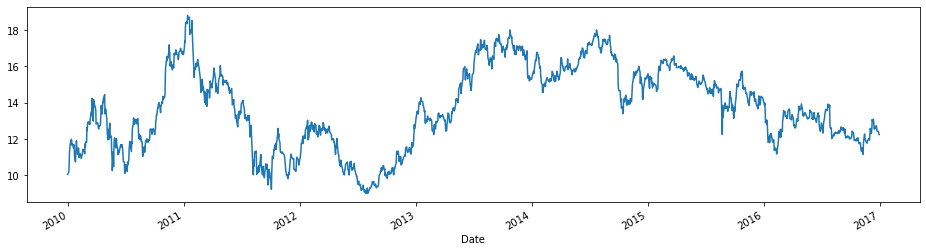

In [17]:
ford['Open'].plot(figsize=(16,4))

In [19]:
tesla['Total Traded']=tesla['Open']*tesla['Volume']
ford['Total Traded']=ford['Open']*ford['Volume']
gm['Total Traded']=gm['Open']*gm['Volume']

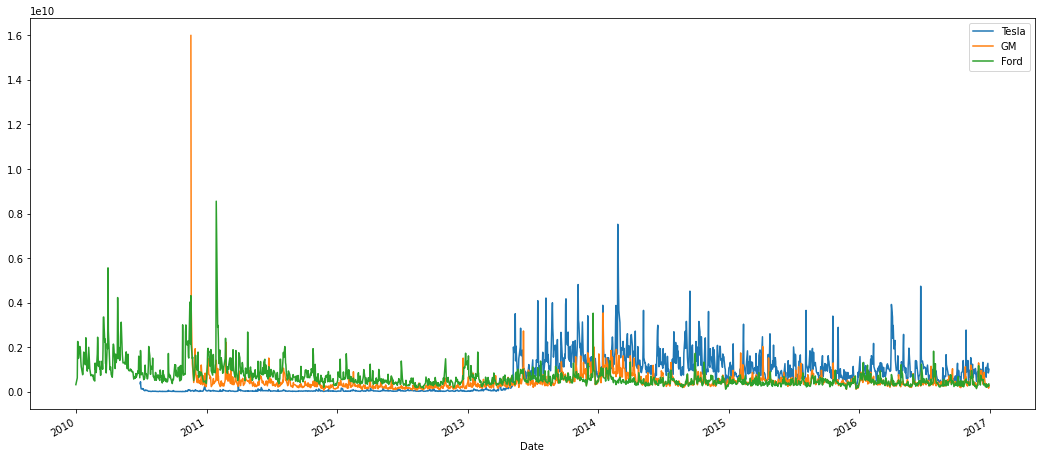

In [21]:
tesla['Total Traded'].plot(figsize=(18,8),label='Tesla')
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()

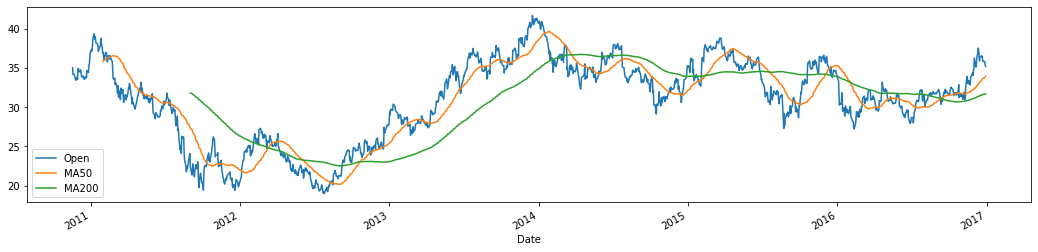

In [22]:
#Moving Average
gm['MA50']=gm['Open'].rolling(50).mean()
gm['MA200']=gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(figsize=(18,4))

In [32]:
from pandas.plotting import scatter_matrix
car_comp=pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns=['Tesla','GM Open','Ford Open']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000139873F2070>,
      dtype=object)

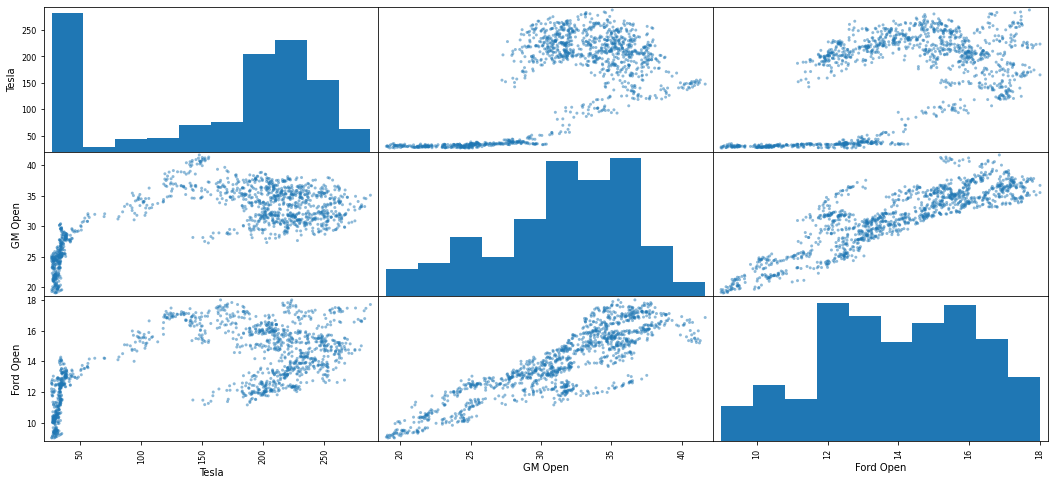

In [33]:
scatter_matrix(car_comp,figsize=(18,8))

In [36]:
#Returns - Daily Change
tesla['Returns']=(tesla['Close']/tesla['Close'].shift(1))-1
ford['Returns']=(ford['Close']/ford['Close'].shift(1))-1
gm['Returns']=(gm['Close']/gm['Close'].shift(1))-1

In [35]:
tesla['Returns']

Date
2012-01-03         NaN
2012-01-04   -0.013177
2012-01-05   -0.021292
2012-01-06   -0.007743
2012-01-09    0.012635
                ...   
2016-12-23    0.023459
2016-12-27    0.029015
2016-12-28    0.000957
2016-12-29   -0.023027
2016-12-30   -0.004611
Name: Returns, Length: 1258, dtype: float64

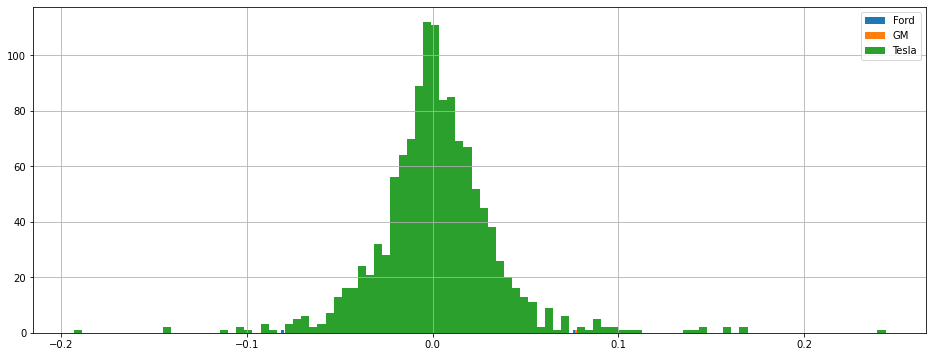

In [39]:
ford['Returns'].hist(bins=100,label='Ford',figsize=(16,6))
gm['Returns'].hist(bins=100,label='GM',figsize=(16,6))
tesla['Returns'].hist(bins=100,label='Tesla',figsize=(16,6))
plt.legend()

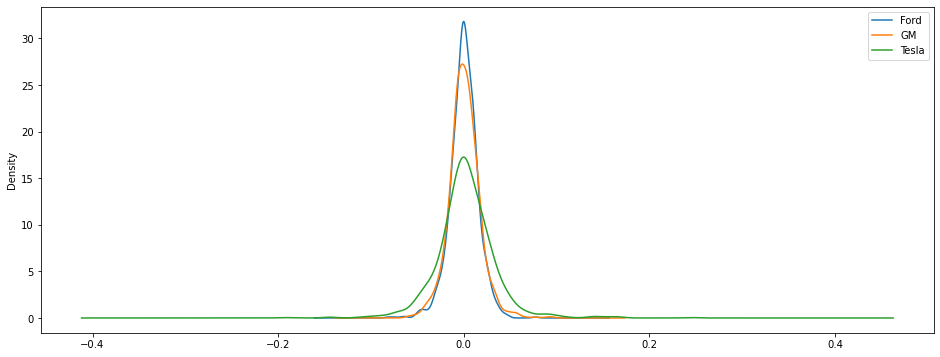

In [41]:
ford['Returns'].plot(kind='kde',label='Ford',figsize=(16,6))
gm['Returns'].plot(kind='kde',label='GM',figsize=(16,6))
tesla['Returns'].plot(kind='kde',label='Tesla',figsize=(16,6))
plt.legend()

In [44]:
tesla['Cumulative Return']=(1+tesla['Returns']).cumprod()
ford['Cumulative Return']=(1+ford['Returns']).cumprod()
gm['Cumulative Return']=(1+gm['Returns']).cumprod()

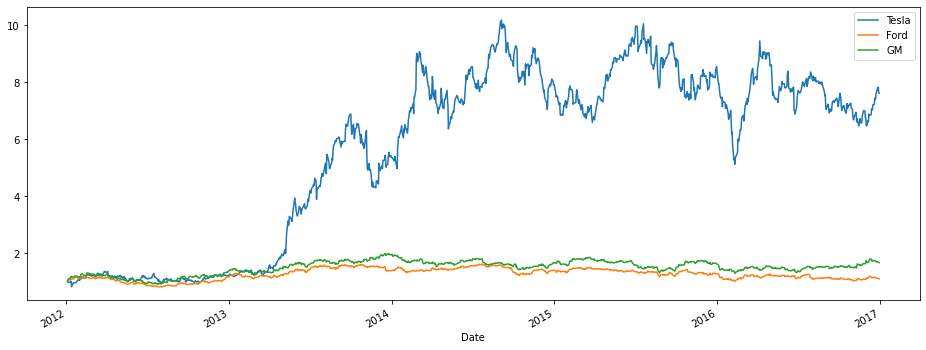

In [45]:
tesla['Cumulative Return'].plot(figsize=(16,6),label='Tesla')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()